In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [4]:
DF = pd.read_csv('titanic-passengers.csv',sep=';')

In [5]:
DF.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
DF.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## get a summary on the number of missing values on each column :
DF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
DF['Age'].fillna(DF['Age'].mean(),inplace=True)

In [10]:
DF.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
DF["Cabin"].fillna('G6',inplace=True)
DF.tail

<bound method NDFrame.tail of      PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex        Age  \
0                           Collander, Mr. Erik Gustaf    male  28.000000   
1                              Moen, Mr. Sigurd Hansen    male  25.000000   
2                               Jensen, Mr. Hans Peder    male  20.000000   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.000000   
4                               Davidson, Mr. Thornton    male  31.000000   
..                                                 ...     ... 

In [12]:
DF.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [13]:
DF["Embarked"].fillna('G6',inplace=True)

In [14]:
DF.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
#encoder=LabelEncoder()
#DF['Sex']=encoder.fit_transform(DF['Sex'])
print((DF['Age']==0.42).value_counts())

False    890
True       1
Name: Age, dtype: int64


In [16]:
age_groups = pd.cut(DF['Age'], bins=[0,19, 40, 65, np.inf])
new_df=pd.crosstab(age_groups, DF['Sex'])
new_df

Sex,female,male
Age,,
"(0.0, 19.0]",75,89
"(19.0, 40.0]",191,386
"(40.0, 65.0]",48,94
"(65.0, inf]",0,8


Text(0, 0.5, 'Sex')

<Figure size 432x288 with 0 Axes>

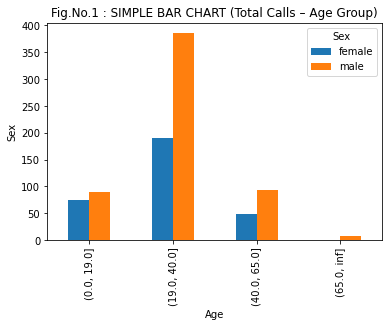

In [17]:
plt.figure(); 
new_df.plot.bar(title='Fig.No.1 : SIMPLE BAR CHART (Total Calls – Age Group)'); plt.xlabel('Age'); plt.ylabel('Sex') 

In [18]:
for x in DF:
     if (DF[DF['Sex'] == male && 19 > DF[DF['Age'] ] && DF[DF['Survived'] =='No' ]])
        new_df['Male_survived'].iloc[0]

SyntaxError: invalid syntax (<ipython-input-18-a999666b96c4>, line 2)

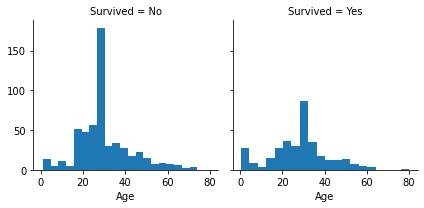

In [17]:
g = sns.FacetGrid(DF, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\mohamed iyadh\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


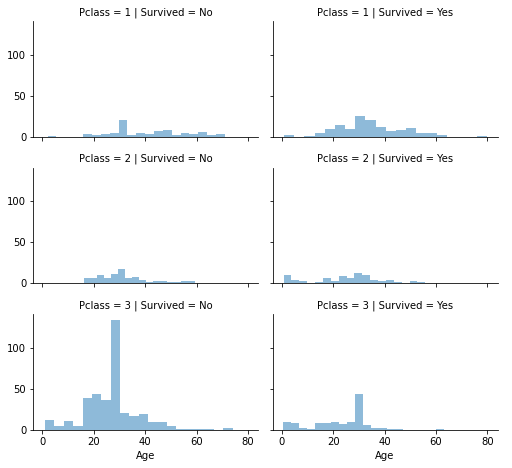

In [18]:
grid = sns.FacetGrid(DF, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [19]:
ggplot(DF, aes(x=Age, fill=factor(Survived))) +geom_histogram(bins=30)+facet_grid(.~Sex)+ggtitle("Age vs Survived")+scale_fill_discrete(name="Survived")

SyntaxError: invalid syntax (<ipython-input-19-2b8b65ee67cf>, line 1)

In [42]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

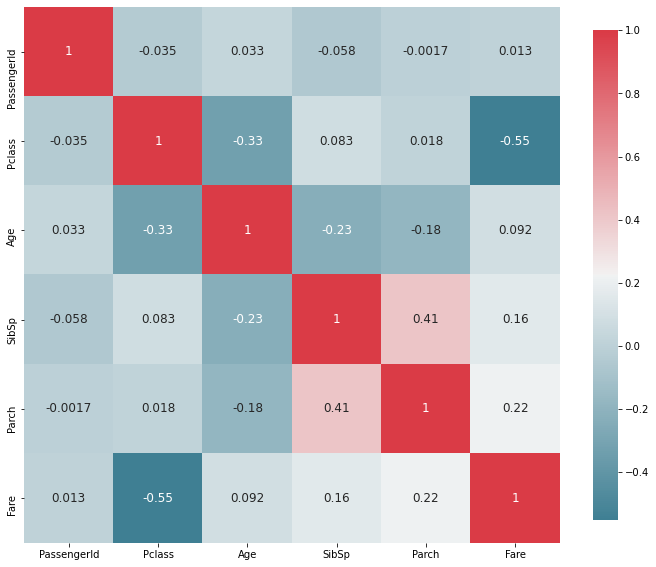

In [21]:
plot_correlation_map( DF )

In [22]:
##Display a labelled heatmap showing the correlation values 
##between the numerical columns in the Data DataFrame
##

###according to the correlation figure we did not have a good correlation between the numerical values 
###of our dataframe so we cannot evaluate an association between any two variables .

In [23]:
DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [19]:
DF['Survived'].replace(['Yes', 'No'],
                        [1, 0], inplace=True)

In [20]:
DF1 = DF.groupby(['Pclass'])['Survived'].mean()
DF1

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [119]:
### Drop Column NAME
#del DF['Name']

In [21]:
def my_function(k):
    x1 = k.split(', ')
    x2 = x1[1].split('.')
    return x2[0]

In [22]:
DF['Name'].astype('string')


0                             Collander, Mr. Erik Gustaf
1                                Moen, Mr. Sigurd Hansen
2                                 Jensen, Mr. Hans Peder
3            Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                                 Davidson, Mr. Thornton
                             ...                        
886                  Nasser, Mrs. Nicholas (Adele Achem)
887                                Sirayanian, Mr. Orsen
888                                  Cacic, Miss. Marija
889                     Petroff, Mr. Pastcho ("Pentcho")
890    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
Name: Name, Length: 891, dtype: string

In [23]:
for i in DF.index:
    
    DF['Name'][i]=my_function(DF['Name'][i])

<ipython-input-23-db01c2bfba23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Name'][i]=my_function(DF['Name'][i])


In [25]:
DF['Name'].unique()


array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'the Countess',
       'Ms'], dtype=object)

In [24]:
DF['Name']

0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Name, Length: 891, dtype: object

In [32]:
DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,Mr,male,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,Mr,male,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,Mr,male,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,Mrs,female,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,Mr,male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,Mrs,female,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,Mr,male,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,Miss,female,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,Mr,male,29.699118,0,0,349215,7.8958,G6,S


In [33]:
DF['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Dr', ' Major', ' Don', ' Master', ' Rev',
       ' Col', ' Mlle', ' Lady', ' Jonkheer', ' Mme', ' Sir', ' Capt',
       ' the Countess', ' Ms'], dtype=object)

In [29]:
def my_function2(s):
    
        if s =="Lady":
            s="Rare" 
            print('b1')
            return s
        else :
            print('b2')

            return s

In [30]:
k="Lady"

my_function2(k)
k

b1


'Lady'

In [35]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

In [36]:
def title_mapping(x):
    return Title_Dictionary[x]


DF["Name"] = DF["Name"].apply(title_mapping)

In [38]:
DF["Name"].unique()

array(['Mr', 'Mrs', 'Miss', 'Officer', 'Royal', 'Master'], dtype=object)

In [40]:
DF['Name'].replace(['Mr', 'Mrs','Miss','Officer','Royal','Master'],[1,2,3,4,5,6], inplace=True)

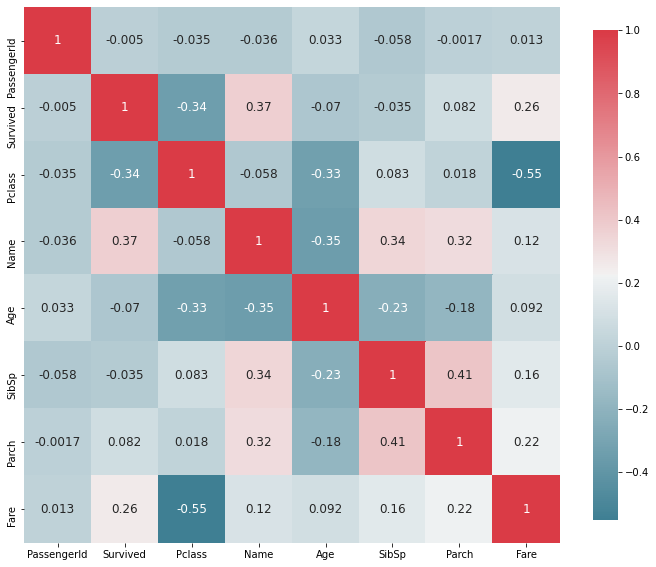

In [43]:
plot_correlation_map( DF )

In [45]:
DF[['Name', 'Survived']].groupby(['Name'], as_index=False).mean()

,Name,Survived
0,1,0.156673
1,2,0.795276
2,3,0.701087
3,4,0.277778
4,5,0.600000
5,6,0.575000


In [46]:
import os
os.getcwd()

'C:\\Users\\mohamed iyadh'